# Load pacakages
For our exercises, you should always use the standar packages from Google Colab unless stated otherwise.

In [10]:
import tensorflow as tf
import numpy as np
import pandas as pd
print(tf.__version__)
print(np.__version__)
print(pd.__version__)

1.13.1
1.14.6
0.22.0


# Load data function
Here you must write down your data loading function

In [0]:
def loadTrainData (default_dir="/default/path/if/needed"):
  x = np.random.rand(16000,1) # write our data loading procedures
  y = np.sin(x)
  return x , y

def loadTestData (default_dir="/default/path/if/needed"):
  x = np.random.rand(160,1) # write our data loading procedures
  y = np.sin(x)
  return x , y

# Structure your model
Create a class to define and use your model

In [0]:
class Model:
  def __init__(self,learning_rate=0.0001, mini_batches=16, neurons=[4]):
    self.lr = learning_rate
    self.mb = mini_batches
    
    self.input = tf.placeholder(tf.float32, shape=(None, 1), name="X")
    self.label = tf.placeholder(tf.float32, shape=(None, 1), name="Y")
    
    self.output = self.input
    for neuron in neurons:
      self.output = tf.layers.dense(self.output, neuron)
      
    self.output = tf.layers.dense(self.output, 1)
    
    self.loss = (self.output - self.label) * (self.output - self.label)
    self.loss = tf.reduce_mean(self.loss)
    
  def get_loss(self):
    return self.loss
  
  def get_xy(self):
    return self.input, self.label
  
  def get_output(self):
    return self.output

# Create an optimization routine
Define your optimization steps

In [0]:
class Optimizer:
  def __init__(self,model):
    self.model     = model
    self.loss      = model.get_loss()
    self.X, self.Y = model.get_xy()
    self.mb        = model.mb
    self.output    = model.get_output()
    
    self.opt       = tf.train.GradientDescentOptimizer(learning_rate = model.lr)
    self.optAction = self.opt.minimize(self.loss)
    
  def batching (self, size):
#     print (size)
    r=np.arange(int(size))
    np.random.shuffle(r)
#     print(r)
    return r
  
  def train (self, dataX, dataY, verbose):
    i     = 0
    loss  = 0
    count = 0
    batchOrder = self.batching(len(dataX))
#     print (batchOrder)
    while (i+self.mb <= len(dataX)):
        
      mbX, mbY   = dataX[batchOrder[i:i+self.mb]] , dataY[batchOrder[i:i+self.mb]]
        
      _ , mbLoss = self.sess.run([self.optAction, self.loss],
                                   feed_dict={
                                       self.X:mbX,
                                       self.Y:mbY
                                   })
      if verbose>1:
        print("\t Inner loss: "+str(mbLoss))
          
      loss  += mbLoss
      i     += self.mb
      count += 1
    loss = loss / count
    return loss
  
  def test  (self, dataX, dataY, verbose):
    i     = 0
    loss  = 0
    count = 0
    batchOrder = self.batching(len(dataX)) 
    while (i+self.mb <= len(dataX)):
        
      mbX, mbY   = dataX[i:i+self.mb] , dataY[i:i+self.mb]
        
      mbLoss = self.sess.run(self.loss,
                                   feed_dict={
                                       self.X:mbX,
                                       self.Y:mbY
                                   })          
      loss  += mbLoss
      i     += self.mb
      count += 1
    loss = loss / count
    return loss
  
  def run   (self, dataX, dataY, testX, testY, epochs, verbose=2):
    historyTR = []
    historyTS = []
    with tf.Session() as self.sess:
      self.sess.run(tf.global_variables_initializer())
      lossTS = self.test  (testX , testY, verbose)
      historyTR.append(lossTS)
      historyTS.append(lossTS)
      for i in range(epochs):
        
        lossTR = self.train (dataX , dataY, verbose)
        lossTS = self.test  (testX , testY, verbose)
        if verbose > 0:
          print("Epoch " +str(i+1)+" : Train Loss = " + str(lossTR)+" :  Test Loss = " + str(lossTS))
        historyTR.append(lossTR)
        historyTS.append(lossTS)
    return historyTR, historyTS

# Structure your calls
Here you should make the main calls

In [29]:
x  , y  = loadTrainData ()
xt , yt = loadTestData  ()

model  = Model ()
opt    = Optimizer (model)
tr, ts = opt.run (x, y, xt, yt, 100, verbose=1)


Epoch 1 : Train Loss = 0.02467498129233718 :  Test Loss = 0.010996215930208563
Epoch 2 : Train Loss = 0.007199721531476825 :  Test Loss = 0.004542905814014375
Epoch 3 : Train Loss = 0.0037176029487745836 :  Test Loss = 0.003206985001452267
Epoch 4 : Train Loss = 0.0028649217528873123 :  Test Loss = 0.0027817410998977722
Epoch 5 : Train Loss = 0.0025152299426845276 :  Test Loss = 0.0025209138169884683
Epoch 6 : Train Loss = 0.002276085881108884 :  Test Loss = 0.0023009659955278037
Epoch 7 : Train Loss = 0.0020747595785651357 :  Test Loss = 0.0021023256005719302
Epoch 8 : Train Loss = 0.0018960576488170774 :  Test Loss = 0.0019226024742238224
Epoch 9 : Train Loss = 0.0017357862322533038 :  Test Loss = 0.00176035639597103
Epoch 10 : Train Loss = 0.0015917070283030625 :  Test Loss = 0.0016138205071911215
Epoch 11 : Train Loss = 0.0014621105112018996 :  Test Loss = 0.0014817478600889443
Epoch 12 : Train Loss = 0.0013456452958635055 :  Test Loss = 0.0013636514078825713
Epoch 13 : Train Loss 

KeyboardInterrupt: ignored

# PLOT

3.0.3


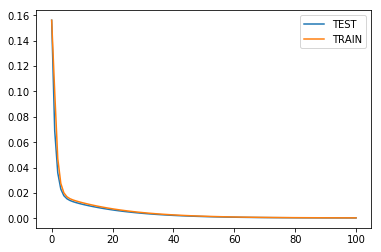

In [7]:
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)
plt.plot(ts, label='TEST')
plt.plot(tr, label='TRAIN')
plt.legend()
plt.show()

# EXERCISE 0
## Your goal is to:
### Expand this model to receive multiple inputs and the output must be of size 2.
Your network must receive 5 different numbers, and output the sumation of cossines of the numbers and the summation of the sines.

### Add L2 and L1 regularizations directly on the loss function and include their coeficcients as hyper-parameters

### Add comments to this code

## Feel free to make changes, as long as they make the code clear and keep a similar structure